# MNIST の主成分分析

# 主成分分析について

* 通常のデータの主成分分析は、データ全体をより分散が大きくなるように新たな軸を設定する → データの特徴がよりはっきりと分かるようになる
* 下記の例では、(x,y) 座標系のデータを (p,q)座標系 (赤軸・青軸) に写像する

主成分 (=固有ベクトル)
[[ 0.52735353  0.84964596]
 [ 0.84964596 -0.52735353]]
平均
[3.5        3.83333333]
寄与度
[0.87315546 0.12684454]
累積寄与度
[0.87315546 1.        ]


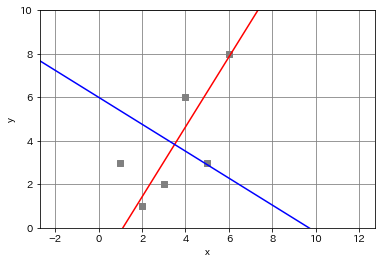

In [30]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

data = np.array([
    [1,3],
    [2,1],
    [3,2],
    [4,6],
    [5,3],
    [6,8]
])

pca = PCA()
pca.fit(data)

print("主成分 (=固有ベクトル)")
print(pca.components_)
print("平均")
print(pca.mean_)
print("寄与度")
print(pca.explained_variance_ratio_)
print("累積寄与度")
print(np.cumsum(pca.explained_variance_ratio_))

plt.figure()
plt.axis('equal')
plt.xlim(0.0, 10.0)
plt.ylim(0.0, 10.0)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='gray')

x = data[:,0]
y = data[:,1]
plt.scatter(x, y, color='gray', marker='s', label='data set')

x = np.arange(-10.0,10.0,0.1)
d1 = pca.components_[0][1] / pca.components_[0][0]
plt.plot(x, d1 * (x - pca.mean_[0] ) + pca.mean_[1], color="red")

d2 = pca.components_[1][1] / pca.components_[1][0]
plt.plot(x, d2 * (x - pca.mean_[0] ) + pca.mean_[1], color="blue")
plt.show()        


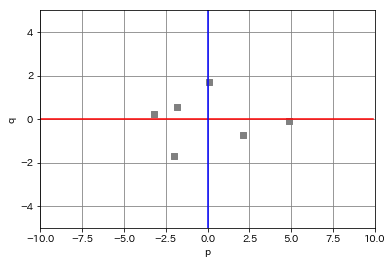

In [29]:
transformed_data = pca.transform(data)

plt.figure()
#plt.axis('equal')
plt.xlim(-10.0, 10.0)
plt.ylim(-5.0, 5.0)
plt.xlabel('p')
plt.ylabel('q')
plt.grid(color='gray')

x = transformed_data[:,0]
y = transformed_data[:,1]
plt.scatter(x, y, color='gray', marker='s', label='data set')

x = np.arange(-10.0,10.0,0.1)
y = np.zeros_like(x)
plt.plot(x, y, color="red")
plt.plot(y, x, color="blue")

plt.show() 